# Module C-Section 19.1, 19,2, 19.3, 19.4 19.5

In [1]:
# Imports
from math import log10


import numpy as np

from time import time

from matplotlib import pyplot as plt

## Bisection Method

In [2]:
# Bisection Method (bm)
def bm_root(x: float, n: int, tol: float = 0.1, max_iter: int = 10**8) -> float:
    """
    Bisection method to find the nth root of x
    :param x: Value to find the nth root of
    :param n: nth root to find
    :param tol: tolerance
    :param max_iter: maximum number of iterations
    :return: nth root of x
    """

    # Ensure that x and tol are strictly positive scalars
    if x <= 0:
        print(f"Converting x to a positive number: {x} -> {abs(x)}")
        x = abs(x)

    if tol <= 0:
        print(f"Converting tol to a positive number: {tol} -> {abs(tol)}")
        tol = abs(tol)

    # Ensure that n is an integer strictly greater than 1
    if not isinstance(n, int) or n <= 1:
        raise ValueError("n must be an integer greater than 1")

    # f(y) = y^N - x
    f = lambda y: y ** n - x

    # Starting values
    a = 0
    b = x
    r = x/2

    while max_iter > 0:
        r = (a + b) / 2

        if abs(f(r)) < tol:
            break

        elif np.sign(f(a)) != np.sign(f(r)):
            b = r

        elif np.sign(f(r)) != np.sign(f(b)):
            a = r

        max_iter -= 1

    if max_iter == 0:
        print("Maximum number of iterations reached")

    return r


x = 1, n = 2, tol = 0.001
Bisection Method:   1.0
Actual:             1.0
Error:              0.0


x = 4, n = 2, tol = 0.001
Bisection Method:   2.0
Actual:             2.0
Error:              0.0


x = 81, n = 4, tol = 0.001
Bisection Method:   3.0
Actual:             3.0
Error:              0.0


x = 286718338524635465625, n = 5, tol = 0.001
Bisection Method:   12345.0
Actual:             12345.0
Error:              0.0


x = 877347265250300669935309761849, n = 10, tol = 0.001
Bisection Method:   987.0
Actual:             987.0
Error:              0.0


Average Time: 0.46194808614422206 ms
Standard Deviation: 0.49970241922643416 ms


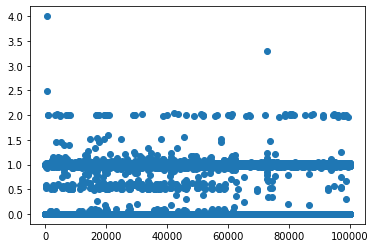

In [3]:
# Function to test bm_root
def test_bm(x: float, n: int, tol: float) -> None:
    """
    Test the Bisection Method
    :param x: Value to find the nth root of
    :param n: nth root to find
    :param tol: tolerance
    :return: True if the nth root of x is within tol of x, False otherwise
    """
    print(f"x = {x}, n = {n}, tol = {tol}")

    # Find the nth root of x using the Bisection method
    n_root = bm_root(x=x, n=n, tol=tol, max_iter=10**8)

    # Round to precision based on tolerance
    round_to = int(abs(log10(tol)))
    n_root = round(n_root, round_to)

    # Print the results
    print(f"Bisection Method:   {n_root}")
    print(f"Actual:             {round(x**(1/n), round_to)}")
    print(f"Error:              {abs(n_root**n - x)}")
    print(f"\n")

bm_tol = 0.001

# Test 1
test_bm(x=1, n=2, tol=bm_tol)

# Test 2
test_bm(x=4, n=2, tol=bm_tol)

# Test 3
test_bm(x=81, n=4, tol=bm_tol)

# Test 4
_n = 5
_x = 12345 ** _n
test_bm(x=_x, n=5, tol=bm_tol)

# Test 5
_n = 10
_x = 987 ** _n
test_bm(x=_x, n=_n, tol=bm_tol)

# Test Time
test_len = 10**5
_time = []
for _x in range(1, test_len):
    start = time()

    for _n in range(2, 5):
        bm_root(x=_x, n=_n, tol=0.01, max_iter=10**8)

    end = time()
    _time.append((end - start)*1000)

# Add plot to fig
fig = plt.scatter(range(1, test_len), _time)

# Print Stats
print(f"Average Time: {np.mean(_time)} ms")
print(f"Standard Deviation: {np.std(_time)} ms")


## Newton Raphson Method

In [4]:
# Newton Raphson Method (nrm_root)
def nrm_root(x: float, n: int, tol: float = 0.00001) -> float:
    """
    Newton Raphson method to find the nth root of x
    :param x: Value to find the nth root of
    :param n: nth root to find
    :param tol: tolerance
    :return: nth root of x
    """

    # Ensure that x and tol are strictly positive scalars
    if x <= 0:
        print(f"Converting x to a positive number: {x} -> {abs(x)}")
        x = abs(x)

    if tol <= 0:
        print(f"Converting tol to a positive number: {tol} -> {abs(tol)}")
        tol = abs(tol)

    # Ensure that n is an integer strictly greater than 1
    if not isinstance(n, int) or n <= 1:
        raise ValueError("n must be an integer greater than 1")

    # f(y) = y^N - x
    f = lambda y: y ** n - x

    # f'(y) = Ny^(N-1)
    f_prime = lambda y: n * y ** (n - 1)

    # Initialize r
    r = x

    # Newton Raphson method to find the nth root of x
    while abs(f(r)) > tol:
        r = r - f(r)/f_prime(r)

    # Return
    return r

x = 1, n = 2, tol = 1e-05
Newton Raphson: 1
Actual:         1.0
Error:          0


x = 4, n = 2, tol = 1e-05
Newton Raphson: 2.0
Actual:         2.0
Error:          0.0


x = 81, n = 4, tol = 1e-05
Newton Raphson: 3.0
Actual:         3.0
Error:          0.0


x = 286718338524635465625, n = 5, tol = 1e-05
Newton Raphson: 12345.0
Actual:         12345.0
Error:          0.0


x = 877347265250300669935309761849, n = 10, tol = 1e-05
Newton Raphson: 987.0
Actual:         987.0
Error:          0.0


Average Time: 0.07108412778005954 ms
Standard Deviation: 0.2569406630589712 ms


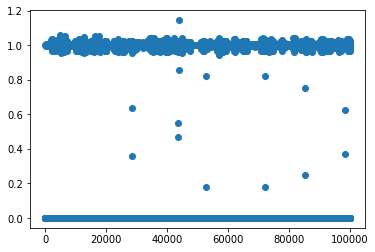

In [5]:
# Newton Raphson Method (nrm_root) Tests
nrm_tol = 0.00001

# Function to test nrm_root
def test_nrm(x: float, n: int, tol: float) -> None:
    """
    Test the Newton Raphson method
    :param x: Value to find the nth root of
    :param n: nth root to find
    :param tol: tolerance
    :return: True if the nth root of x is within tol of x, False otherwise
    """
    print(f"x = {x}, n = {n}, tol = {tol}")

    # Find the nth root of x using the Newton Raphson method
    n_root = nrm_root(x=x, n=n, tol=tol)

    # Round to precision based on tolerance
    round_to = int(abs(log10(tol)))
    n_root = round(n_root, round_to)

    # Print the results
    print(f"Newton Raphson: {n_root}")
    print(f"Actual:         {round(x**(1/n), round_to)}")
    print(f"Error:          {abs(n_root**n - x)}")
    print(f"\n")

# Test 1
test_nrm(x=1, n=2, tol=nrm_tol)

# Test 2
test_nrm(x=4, n=2, tol=nrm_tol)

# Test 3
test_nrm(x=81, n=4, tol=nrm_tol)

# Test 4
_n = 5
_x = 12345 ** _n
test_nrm(x=_x, n=5, tol=nrm_tol)

# Test 5
_n = 10
_x = 987 ** _n
test_nrm(x=_x, n=_n, tol=nrm_tol)

# Test Time
test_len = 10**5
_time = []
for _x in range(1, test_len):
    start = time()

    for _n in range(2, 5):
        nrm_root(x=_x, n=_n, tol=0.01)

    end = time()
    _time.append((end - start)*1000)

# Add plot to fig
fig = plt.scatter(range(1, test_len), _time)

# Print Stats
print(f"Average Time: {np.mean(_time)} ms")
print(f"Standard Deviation: {np.std(_time)} ms")

After building an algorithm to find the n-th root of x with both the *Bisection* and *Newton-Raphson* methods, we can notice that the **Newton Raphson** method is significantly faster, accurate, and in general better than the **Bisection** method.
In terms of time, the **Newton Raphson** method is faster than the **Bisection** method by a factor of **6.5**. The average time for the **Newton Raphson** method is **0.071** milliseconds, while the average time for the **Bisection** method is **0.462** milliseconds. Furthermore, the standard deviation for the **Newton Raphson** method is **0.257** milliseconds, while the standard deviation for the **Bisection** method is **0.500** milliseconds showing that the newton raphson method takes consistently the same amount of time. This is a significant improvement over the bisection method.
Overall, the **Newton Raphson** method offers a combination of speed and accuracy that is better than the **Bisection** method.

Average Time: 0.00863756472724029 ms
Standard Deviation: 0.09272153697242357 ms


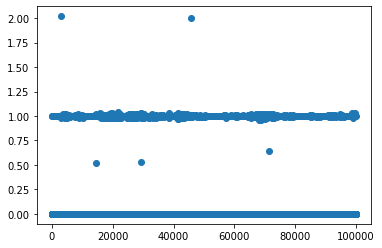

In [6]:
# Numpy's built-in nth root function test
test_len = 10**5
_time = []
for _x in range(1, test_len):
    start = time()

    for _n in range(2, 5):
        np.power(_x, 1/_n)

    end = time()
    _time.append((end - start)*1000)

# Add plot to fig
fig = plt.scatter(range(1, test_len), _time)

# Print Stats
print(f"Average Time: {np.mean(_time)} ms")
print(f"Standard Deviation: {np.std(_time)} ms")

However, comparing the **Newton Raphson** method to numpy's built-in nth root function, we can see that the  numpy's built-in nth root function is significantly faster, and the standard deviation is significantly lower. The average time for the  numpy's built-in nth root function is **0.0086** milliseconds, while the average time for the **Newton Raphson** method is **0.071** milliseconds. Furthermore, the standard deviation for the built-in Python nth root function is **0.0927** milliseconds, while the standard deviation for the **Newton Raphson** method is **0.257** milliseconds showing that the  numpy's built-in nth root function takes consistently lesser amount of time than the newton raphson method. In conclusion, the numpy's built-in nth root function is faster by a factor of **8.25**.

Average Time: 0.0012104989938754368 ms
Standard Deviation: 0.034781188916755815 ms


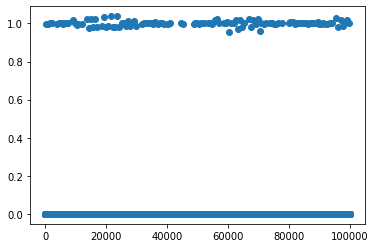

In [7]:
test_len = 10**5
_time = []
for _x in range(1, test_len):
    start = time()

    for _n in range(2, 5):
        _x**(1/_n)

    end = time()
    _time.append((end - start)*1000)

# Add plot to fig
fig = plt.scatter(range(1, test_len), _time)

# Print Stats
print(f"Average Time: {np.mean(_time)} ms")
print(f"Standard Deviation: {np.std(_time)} ms")